In [140]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost.sklearn import XGBRegressor
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
import hyperopt
import sys
sys.path.append('../spock/')
#from simsetup import get_sim
#from modelfitting import ROC_curve, stable_unstable_hist, calibration_plot, unstable_error_fraction
try:
    plt.style.use('paper')
except:
    pass
%matplotlib inline

In [141]:
import rebound
import numpy as np
import pandas as pd
import warnings
from multiprocessing import Process
import sys
from collections import OrderedDict
from multiprocessing import Pool
sys.path.insert(1, '..')
#print(path)
from SPOCKalt import *
sys.path.insert(1, '../SPOCKalt')
#Intigration/simsetup.py
from SPOCKalt import featureKlassifier
from SPOCKalt import simsetup

In [142]:
dataset = pd.read_csv('../secondMMRintData/tryfirstorder3br.csv')

In [143]:
initial = pd.read_csv('../secondMMRintData/originalCondAllData.csv')

In [144]:
test = dataset.drop(dataset[dataset['prelimStable']==True].index)
test = test.drop(test[test['Stable']==False].index)

In [145]:
plot = dataset
plot = plot.drop(plot[plot['instability_time'] <1e8].index)


In [146]:
# plot = plot.drop(plot[plot['threeBRfillfac']>1].index)
# plot =plot.sample(n=7)

In [147]:
plot = plot.drop(plot[plot['threeBRfillfac']<18].index)
plot = plot.drop(plot[plot['Stable']==False].index)
plot = plot.drop(plot[plot['index']==113762].index)
#param for 7inomolies

In [148]:
plot

,index,EMcrossnear,MMRstrengthnear,twoMMRstrengthnear,MMRstrengthWnear,twoMMRstrengthWnear,EMcrossfar,MMRstrengthfar,twoMMRstrengthfar,MMRstrengthWfar,...,EMnear,EPnear,EMfar,EPfar,EMouter,EPouter,prelimStable,Stable,instability_time,shadow_instability_time
8989,8989,0.035150,0.072216,0.069465,0.002055,0.000119,0.795603,0.000004,1.097932e-07,0.000035,...,0.007498,0.001255,0.000795,0.000021,0.008241,0.000017,True,True,1.000049e+09,1.000049e+09
53289,53289,0.027607,0.628330,0.010454,0.001995,0.001999,0.682728,0.000028,7.539808e-06,0.000091,...,0.007178,0.018724,0.017800,0.000135,0.023586,0.000038,True,True,1.000000e+09,1.000000e+09
62512,62512,0.027607,0.628330,0.010454,0.001995,0.001999,0.682728,0.000028,7.539808e-06,0.000091,...,0.007178,0.018724,0.017800,0.000135,0.023586,0.000038,True,True,1.000000e+09,1.000000e+09
72620,72620,0.034892,0.414495,0.025368,0.002870,0.002878,0.659229,0.000006,0.000000e+00,0.000069,...,0.023746,0.016444,0.018859,0.000395,0.018505,0.000092,True,True,1.000000e+09,1.000000e+09
75295,75295,0.027607,0.628330,0.010454,0.001995,0.001999,0.682728,0.000028,7.539808e-06,0.000091,...,0.007178,0.018724,0.017800,0.000135,0.023586,0.000038,True,True,1.000000e+09,1.000000e+09
95148,95148,0.028827,0.579389,0.022892,0.002372,0.002376,0.866361,0.000265,7.771767e-07,0.000321,...,0.022519,0.006195,0.008956,0.014425,0.020867,0.014500,True,True,1.000000e+09,1.000000e+09
131943,131943,0.026609,0.092595,0.011490,0.001664,0.001667,0.710198,0.000010,5.766318e-06,0.000030,...,0.005786,0.020170,0.008942,0.028869,0.014429,0.028825,True,True,1.000000e+09,1.000000e+09


In [127]:
plot[['m1','pomega1','e1','a1','m2','pomega2','e2','a2','m3','pomega3','e3','a3',]]

,m1,pomega1,e1,m2,pomega2,e2,m3,pomega3,e3
8989,0.000097,0.582584,0.000004,2.290862e-06,1.415617,0.000797,1.564891e-07,1.071762,0.008244
53289,0.000071,3.656528,0.000001,5.398661e-07,-3.360951,0.017801,1.115936e-07,3.129953,0.023587
62512,0.000071,3.656528,0.000001,5.398661e-07,-3.360951,0.017801,1.115936e-07,3.129953,0.023587
72620,0.000084,1.770916,0.000014,1.730529e-06,1.404323,0.018872,3.805888e-07,2.780693,0.018512
75295,0.000071,3.656528,0.000001,5.398661e-07,-3.360951,0.017801,1.115936e-07,3.129953,0.023587
95148,0.000096,-5.071562,0.014509,9.613635e-07,0.758990,0.006728,1.197440e-07,2.429232,0.020833
131943,0.000061,-2.404079,0.028905,3.182482e-07,4.135679,0.022845,3.986578e-07,4.302661,0.018162


In [110]:
plot[['e1','e2','e3','a1','a2','a3']]

,e1,e2,e3,a1,a2,a3
8989,0.000004,0.000797,0.008244,1.0,1.795603,1.858719
53289,0.000001,0.017801,0.023587,1.0,1.682728,1.729183
62512,0.000001,0.017801,0.023587,1.0,1.682728,1.729183
72620,0.000014,0.018872,0.018512,1.0,1.659229,1.717123
75295,0.000001,0.017801,0.023587,1.0,1.682728,1.729183
95148,0.014509,0.006728,0.020833,1.0,1.866361,1.920162
131943,0.028905,0.022845,0.018162,1.0,1.710198,1.755705


In [9]:
import rebound

In [179]:
initial.iloc[131943,2:].to_csv('zsendEritas.csv')

In [24]:
simlist = []
for x in plot.iloc[:,0]:
    simlist.append(simsetup.get_simList(initial.iloc[x,2:]))
for each in simlist:
    simsetup.init_sim_parameters(each)

/home/ethadhani/SPOCKalt/secondMMRintData/../SPOCKalt/simsetup.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sim.add(m=data[0], x=data[1], y=data[2], z=data[3], vx=data[4], vy=data[5], vz=data[6])
/home/ethadhani/SPOCKalt/secondMMRintData/../SPOCKalt/simsetup.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sim.add(m=data[7], x=data[8], y=data[9], z=data[10], vx=data[11], vy=data[12], vz=data[13])
/home/ethadhani/SPOCKalt/secondMMRintData/../SPOCKalt/simsetup.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels

In [284]:
initial.iloc[1311,0:]

Unnamed: 0                              1311
runstring                        0001311.bin
p0m                                      1.0
p0x                                -0.000008
p0y                                -0.000024
p0z                                     -0.0
p0vx                                0.000098
p0vy                               -0.000034
p0vz                                0.000001
p1m                                      0.0
p1x                                -0.861103
p1y                                -0.508515
p1z                                 0.002029
p1vx                                3.194344
p1vy                               -5.408601
p1vz                                0.143358
p2m                                 0.000001
p2x                                -0.963442
p2y                                -0.776442
p2z                                -0.008295
p2vx                                3.658817
p2vy                               -4.223887
p2vz      

In [294]:
sim = simsetup.get_simList(initial.iloc[1311,2:])

/home/ethadhani/SPOCKalt/secondMMRintData/../SPOCKalt/simsetup.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sim.add(m=data[0], x=data[1], y=data[2], z=data[3], vx=data[4], vy=data[5], vz=data[6])
/home/ethadhani/SPOCKalt/secondMMRintData/../SPOCKalt/simsetup.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sim.add(m=data[7], x=data[8], y=data[9], z=data[10], vx=data[11], vy=data[12], vz=data[13])
/home/ethadhani/SPOCKalt/secondMMRintData/../SPOCKalt/simsetup.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels

In [295]:
simsetup.init_sim_parameters(sim)

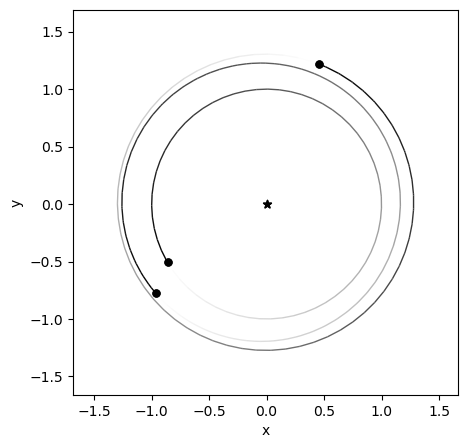

In [296]:
rebound.OrbitPlot(sim)

In [297]:
sim.integrate(1e4, exact_finish_time=0)

Collision: Two particles collided (d < r1+r2)

In [298]:
sim.t

564.9690711354754

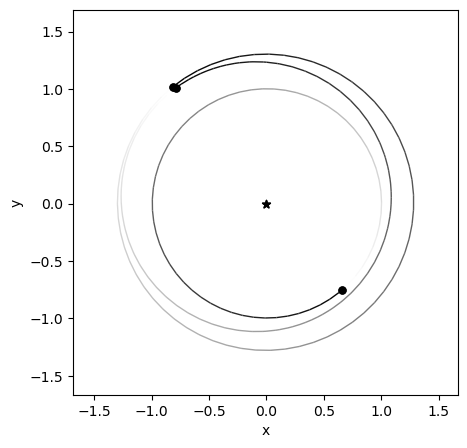

In [293]:
rebound.OrbitPlot(sim)

In [288]:
# for x in range(10000):
#     sim.integrate(x)
#     rebound.OrbitPlot(sim)

In [25]:
def int(sim):
    Nout = 1000
    Nint = 8
    times = np.linspace(0,Nint,Nout)
    
    p2p1 = []
    p3p2 = []
    ps = sim.particles
    for time in times:
        try:
            sim.integrate(10**time, exact_finish_time=0)
            p2p1.append((ps[2].P/ps[1].P))
            p3p2.append((ps[3].P/ps[2].P))
            #print(p2p1)
        except:
            p2p1.append(np.nan)
            p3p2.append(np.nan)
        #labels = [lable]*Nout
    tseries = pd.DataFrame({'p2/p1': p2p1, 'p3/p2': p3p2, 'times': times})


    return tseries


In [27]:
%%time
if __name__ == "__main__":  # confirms that the code is under main function

    
    with Pool() as p:
        new = list(p.map(int, simlist))
    # test = list(map(runInt, bound))
    # print(test)
    data = pd.concat(new)
 

CPU times: user 137 ms, sys: 447 ms, total: 585 ms
Wall time: 1h 13min 43s


In [26]:
len(simlist)

7

<Axes: xlabel='p2/p1', ylabel='p3/p2'>

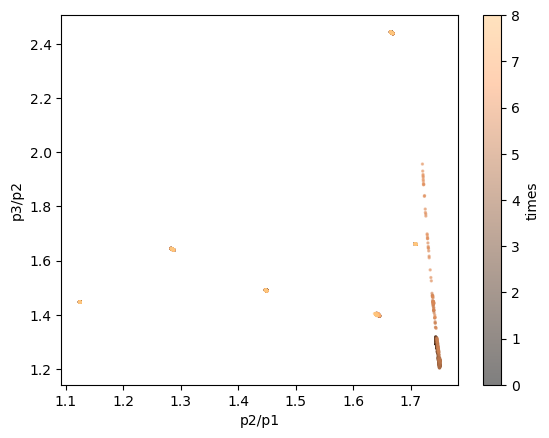

In [28]:

data.plot.scatter(x="p2/p1", y="p3/p2",s=2, c="times", colormap="copper", alpha=.5)


In [29]:
#data.to_csv('7inomolies.csv') the outlier ones
#data.to_csv('7norm.csv') normy ones

/tmp/ipykernel_74424/3706941219.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter((data['p2/p1']),(data['p3/p2']), s=2, c=((data['times'])), cmap=plt.cm.get_cmap("copper",20),alpha=1)


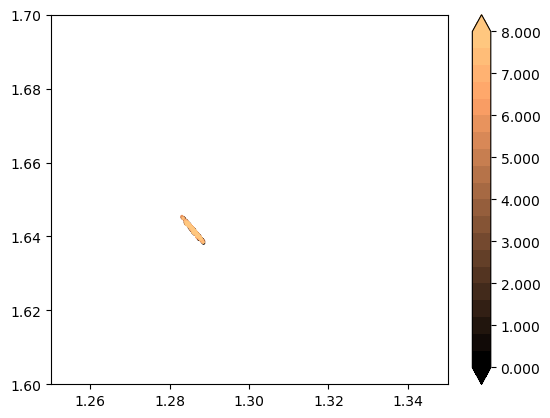

In [31]:
ax = plt.axes()
plt.scatter((data['p2/p1']),(data['p3/p2']), s=2, c=((data['times'])), cmap=plt.cm.get_cmap("copper",20),alpha=1)
cbar = plt.colorbar(orientation="vertical", extend="both",
                   pad=0.05, shrink=1, aspect=20, format="%.3f")
ax.set_xlim([1.25,1.35])
ax.set_ylim([1.6,1.7])
plt.show()

In [ ]:
plt.scatter()

In [41]:
data

,p2/p1,p3/p2,times
0,1.333927,1.096771,0.0000
1,1.333917,1.096770,0.0006
2,1.333927,1.096771,0.0012
3,1.333917,1.096770,0.0018
4,1.333927,1.096771,0.0024
...,...,...,...
9995,0.000000,0.000000,5.9976
9996,0.000000,0.000000,5.9982
9997,0.000000,0.000000,5.9988
9998,0.000000,0.000000,5.9994
